<img src="../Pics/MLSb-T.png" width="160">
<br><br>
<center><u><H1>K-Means</H1></u></center>

In [1]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
iris = load_iris()
X=iris.data
y=iris.target

In [3]:
from sklearn.cluster import KMeans

In [4]:
kmeans=KMeans(n_clusters=3)

In [5]:
X2D = X[:,[0,1]]
kmeans.fit(X2D,y)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [6]:
kmeans.cluster_centers_

array([[5.77358491, 2.69245283],
       [6.81276596, 3.07446809],
       [5.006     , 3.418     ]])

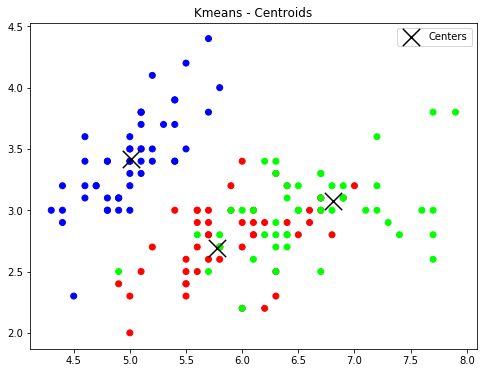

In [7]:
f, ax = plt.subplots(figsize=(8, 6))
ax.scatter(X2D[:,0], X2D[:,1], c=y, cmap=plt.cm.brg)
ax.scatter(kmeans.cluster_centers_[:,0],
          kmeans.cluster_centers_[:, 1], marker="x", s=300,
          color='black', label='Centers')
ax.set_title("Kmeans - Centroids")
ax.legend(loc='best')

## The Elbow Method

### If K is not specified, the optimal number of clusters can be achieve using the elbow method, that plots the value of the cost function producing by different values of K.

In [8]:
from scipy.spatial.distance import cdist
K = range(1, 10)
meandist = []

In [9]:
for k in K:
    km = KMeans(n_clusters=k)
    km.fit(X2D,y)
    meandist.append(sum(np.min(cdist(X2D, km.cluster_centers_,
                                    'euclidean'), axis=1)) / X2D.shape[0]) 

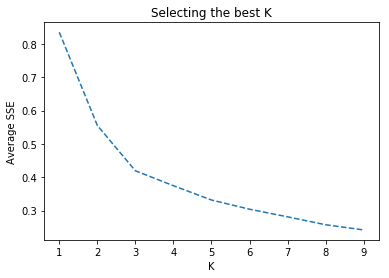

In [10]:
plt.plot(K, meandist, '--')
plt.xlabel('K')
plt.ylabel('Average SSE') # within-cluster Sum of squared errors
plt.title('Selecting the best K')
plt.show()

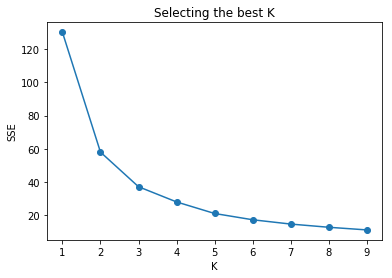

In [11]:
#Another method to calculate distortion
#cluster inertia = the within-cluster sum of squared errors(SSE)
distortions = []
for k in K:
    km = KMeans(n_clusters=k)
    km.fit(X2D,y)
    distortions.append(km.inertia_)
    
plt.plot(K, distortions, marker='o')
plt.xlabel('K')
plt.ylabel('SSE') # within-cluster sum of squared errors
plt.title('Selecting the best K')
plt.show()    

## Reference:

http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html